# Focus stacking with image bunches

Example of focus stacking with vignetting correction.

Note that only a small number of frames has been uploaded, and the final image focus is not optimal. 

In [2]:
import sys
sys.path.append('../')
from config.constants import constants
from focus_stack import *

In [3]:
job = StackJob("job", "../tests")
job.add_action(NoiseDetection("noise-map", input_path=["input/img-vignetted"],
                              channel_thresholds=(10, 10, 10), plot_range=(7, 16)))
job.run()

[INF] noise-map: map noisy pixels from frames in folder: input/img-vignetted                              


noise-map:   0%|          | 0/4 [00:00<?, ?it/s]

[INF] noise-map: hot pixels: rgb: 142, r: 39, g: 81, b: 56                              
[INF] noise-map: writing hot pixels map file: noise-map/hot_pixels.png                              
[INF] noise-map: elapsed time: 00:00:00.12s                              
[INF] noise-map: completed                              
[INF] job: elapsed time: 00:00:00.12s                              
[INF] job: completed                              


In [4]:
job = StackJob("job", "../tests", input_path="input/img-vignetted")
job.add_action(CombinedActions("align", [MaskNoise(), Vignetting(max_correction=0.9), AlignFrames(),
                                     BalanceFrames(channel=constants.BALANCE_RGB,
                                                   corr_map=constants.BALANCE_MATCH_HIST,
                                                   mask_size=0.8)],
                       output_path="output/img-ex1-align"))
job.add_action(FocusStack("stack", PyramidStack(), postfix='_pyr', exif_path='',
                          output_path="output/img-ex1-stack"))
job.run()

[INF] align: begin run                              
[INF] align: : 4 files in folder: input/img-vignetted                              
[INF] align: focus stacking                              
[INF] align:                                                                                                                     
[INF] align: elapsed time: 00:00:03.25s                              
[INF] align: completed                              
[INF] stack: : 4 files in folder: output/img-ex1-align                              
[INF] stack: focus stacking                              
[INF] stack: elapsed time: 00:00:01.03s                                                      
[INF] stack: completed                              
[INF] job: elapsed time: 00:00:04.28s                              
[INF] job: completed                              


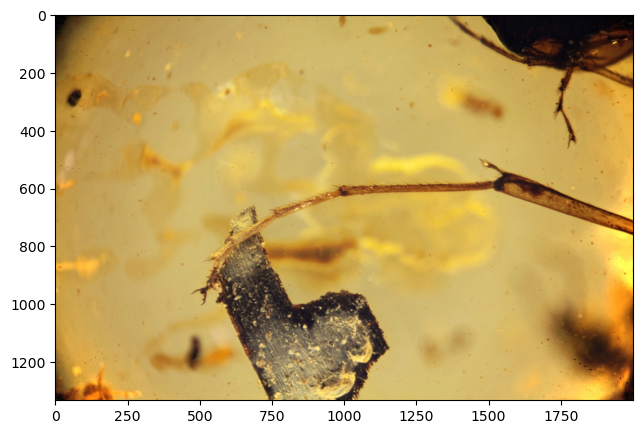

In [5]:
from focus_stack.utils import img_8bit, read_img
import matplotlib.pyplot as plt
import cv2

img = cv2.cvtColor(read_img("../tests/output/img-ex1-stack/vig-0000_pyr.jpg"), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 5))
plt.imshow(img, 'gray')
plt.show()